# This analysis is based in the competition of Kaggle "House Prices: Advanced Regression Techniques".
## More information at:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pylab
%matplotlib inline

In [2]:
file = 'train.csv'
data = pd.read_csv(file,delimiter=',')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print('The number of observations is:',data.shape[0])
print('The number of features is:',data.shape[1])      

The number of observations is: 1460
The number of features is: 81


## Explore SalePrice (target variable) basic Statistics. 

In [4]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
print("The mean of SalePrice is:{}".format(round(data['SalePrice'].mean())))
print("The median of SalePrice is:{}".format(data['SalePrice'].median()))

The mean of SalePrice is:180921.0
The median of SalePrice is:163000.0


In [6]:
# Quantiles
data['SalePrice'].quantile([0.25,0.50,0.75,1])

0.25    129975.0
0.50    163000.0
0.75    214000.0
1.00    755000.0
Name: SalePrice, dtype: float64

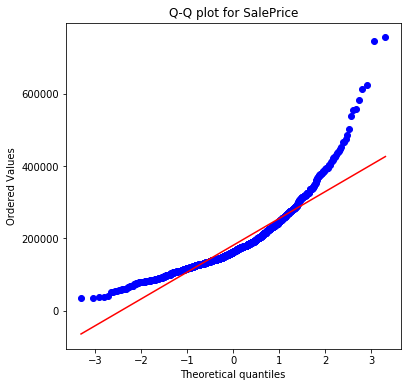

In [7]:
# Create QQ plot to examine distribution
plt.figure(figsize=(6, 6))
st.probplot(data['SalePrice'].values, dist="norm", plot=pylab)
plt.title('Q-Q plot for SalePrice')
pylab.show()

C:\Users\Maria\Anaconda3\envs\assignment-2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


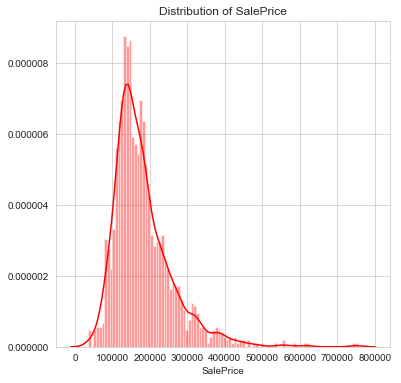

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 6))
sns.distplot(a = data['SalePrice'],bins=100, color="red")
plt.title("Distribution of SalePrice")
plt.show()

In [9]:
print('The skewness of Sale Price is:{}'.format(round(data['SalePrice'].skew(),2)))
print('The kurtosis of Sale Price is:{}'.format(round(data['SalePrice'].kurtosis(),2)))

The skewness of Sale Price is:1.88
The kurtosis of Sale Price is:6.54


C:\Users\Maria\Anaconda3\envs\assignment-2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


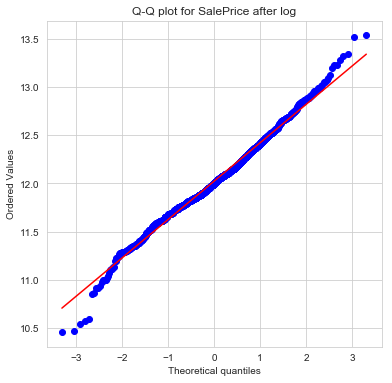

In [10]:
# Create QQ plot to examine distribution after take the log values
plt.figure(figsize=(6, 6))
st.probplot(np.log(data['SalePrice'].as_matrix()), dist="norm", plot=pylab)
plt.title('Q-Q plot for SalePrice after log')
pylab.show()

In [11]:
# Find skewness and kurtosis after log values
print('The skewness of Sale Price is:{}'.format(round(st.skew(np.log(data['SalePrice'].as_matrix())),2)))
print('The kurtosis of Sale Price is:{}'.format(round(st.kurtosis(np.log(data['SalePrice'].as_matrix())),2)))

The skewness of Sale Price is:0.12
The kurtosis of Sale Price is:0.8


C:\Users\Maria\Anaconda3\envs\assignment-2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Maria\Anaconda3\envs\assignment-2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


``` Conclusions for SalePrice:
    1) Observe positive skewness and leptokurt distribution
    2) Observe outliers
    3) After take the log values observe a distribution closest to normal```

## Create Groups based on feature of MSZoning. Examine mean SalePrice of each group.

In [12]:
data[['MSZoning','SalePrice']].groupby('MSZoning').mean()

,SalePrice
MSZoning,
C (all),74528.000000
FV,214014.061538
RH,131558.375000
RL,191004.994787
RM,126316.830275


In [13]:
data[['MSZoning','SalePrice']].groupby('MSZoning').count()

,SalePrice
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


In [14]:
group_C = data['SalePrice'][data['MSZoning']=='C (all)']
group_FV = data['SalePrice'][data['MSZoning']=='FV']
group_RH = data['SalePrice'][data['MSZoning']=='RH']
group_RL = data['SalePrice'][data['MSZoning']=='RL']
group_RM = data['SalePrice'][data['MSZoning']=='RM']

In [15]:
# Anova test
f1,p1 = st.f_oneway(group_C,group_FV,group_RH,group_RL,group_RM)
print(f1,p1)
# Log values
f2,p2 = st.f_oneway(np.log(group_C.values),
                    np.log(group_FV.values),
                    np.log(group_RH.values),
                    np.log(group_RL.values),
                    np.log(group_RM.values))
print(f2,p2)
# Exclude group_C or group_RH
f3,p3 = st.f_oneway(np.log(group_FV.values),
                    np.log(group_RL.values),
                    np.log(group_RM.values))
print(f3,p3)

43.84028167245718 8.817633866272648e-35
77.60784253102662 1.0213428543580432e-59
119.19698530754448 1.3161563795792254e-48


```Coclusions about categorize price based on MSZoning:
    1) Almost one mean value is statistically different from the others
    2) Even if I exclude the groups with small number of observations, result does not change```

## Find missing values of every feature

In [16]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [17]:
# mean price of houses with pool is very high!
round(data[['PoolQC','SalePrice']].dropna()['SalePrice'].mean())

288139.0

In [18]:
# Observe that only 7 observations has label about pool.
# Drop columns PoolArea, Pool Quality as outliers.
data[['PoolArea','PoolQC','SalePrice']].dropna()
data2 = data.drop(['PoolArea','PoolQC'],axis=1) # my new dataframe
# Drop also the Alley (small street). Seems pointless to keep it. Has nothing to do with MSZoning or SalePrice
data[['Street','Alley','SalePrice']]
data2 = data2.drop('Alley',axis=1)

In [19]:
data2.shape

(1460, 78)

## Explore to drop outliers based on SalePrice

In [20]:
data[['SalePrice','PoolArea']].sort_values(by='SalePrice',ascending=False).head()

,SalePrice,PoolArea
691,755000,0
1182,745000,555
1169,625000,0
898,611657,0
803,582933,0


## Explore correlation of SalePrice with categorical variables

In [21]:
data2[['OverallCond','OverallQual']].sort_values(by='OverallCond').head()

,OverallCond,OverallQual
375,1,1
378,2,9
88,2,3
398,2,5
676,2,4


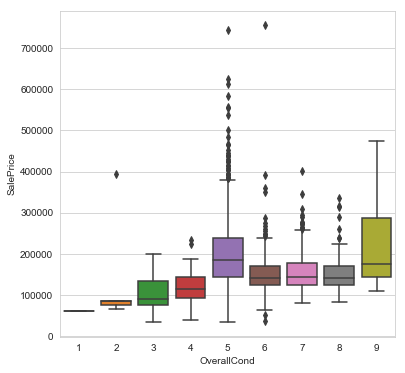

In [22]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="OverallCond", y="SalePrice", data=data2[['OverallCond','SalePrice']])
plt.show()

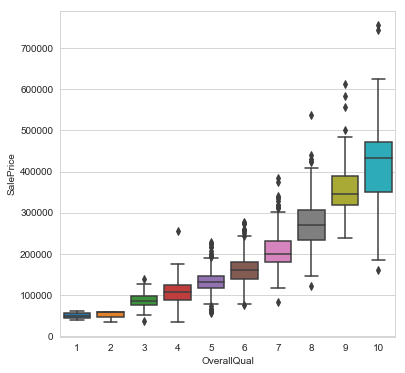

In [23]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="OverallQual", y="SalePrice", data=data2[['OverallQual','SalePrice']])
plt.show()

## Deal with oldness of house

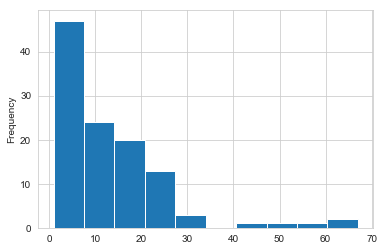

In [24]:
# What is considered an old house? (50 y)
(data2['YearBuilt'].sort_values().value_counts()).plot(kind='hist')
plt.show()

In [25]:
max_year = data2['YearBuilt'].max() # Max year is 2010
treshold = max_year-50 # houses before 1960 consider as old (50y)
# Create new column with nan values to categorize old and new houses
data2['Years'] = np.nan
data2.loc[data2['YearBuilt'] > treshold, 'Years'] = 1 # new houses
data2.loc[data2['YearBuilt'] <= treshold, 'Years'] = 0 # old houses
year = data2['Years'].value_counts().to_frame().reset_index().rename(columns = {'index':'Oldness','Years':'obs'})
year.loc[year['Oldness'] == 0, 'Oldness'] = 'Old'
year.loc[year['Oldness'] == 1, 'Oldness'] = 'New'

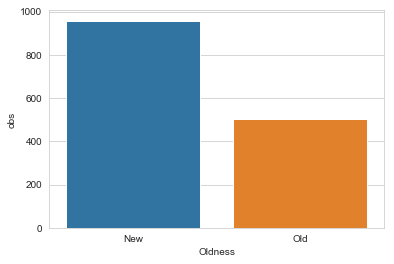

In [26]:
sns.barplot(x='Oldness',y = 'obs',data=year)
plt.show()

In [27]:
# Create 2 groups. Houses that are not reconstructed and houses that are reconstructed
# If YearBuilt = YearRemodAdd, then it hasn't been any reconstruction to the house
no_recon = data2[data2['YearRemodAdd']==data2['YearBuilt']][['YearBuilt','SalePrice']]
recon = data2[data2['YearRemodAdd'] != data2['YearBuilt']][['YearBuilt','SalePrice']]

price_no_recon_old = round(no_recon[no_recon['YearBuilt'] <= 1960]['SalePrice'].mean())
print('The mean SalePrice of houses that are in category Old and they havent been reconstructed is:{}'.format(price_no_recon_old))
print('The mean SalePrice of houses that are in category New and they havent been reconstructed is:',no_recon[no_recon['YearBuilt'] > 1960]['SalePrice'].mean())
#print(recon['SalePrice'].mean())
print('The mean SalePrice of houses that are in category Old and they have been reconstructed is:',recon[recon['YearBuilt'] <= 1960]['SalePrice'].mean())
print('The mean SalePrice of houses that are in category New and they have been reconstructed is:',recon[recon['YearBuilt'] > 1960]['SalePrice'].mean())

The mean SalePrice of houses that are in category Old and they havent been reconstructed is:130993.0
The mean SalePrice of houses that are in category New and they havent been reconstructed is: 191445.90950920247
The mean SalePrice of houses that are in category Old and they have been reconstructed is: 137623.05384615384
The mean SalePrice of houses that are in category New and they have been reconstructed is: 231954.37581699347


In [28]:
data2['Reconstruction'] = np.nan

a = data2['Years']==0 # old
b = data2['YearRemodAdd']==data2['YearBuilt'] # no_recon

data2.loc[a & b, 'Reconstruction'] = 0

In [29]:
c = data2['Years']==1 # new
d = data2['YearRemodAdd'] != data2['YearBuilt'] # recon
e = data2['Years']==1 # new
f = data2['YearRemodAdd'] == data2['YearBuilt'] # no_recon
g = data2['Years']==0 #old
h = data2['YearRemodAdd'] != data2['YearBuilt'] # recon

data2.loc[(c & d) | (e & f) | (g & h) , 'Reconstruction'] = 1

In [30]:
data2['Reconstruction'].value_counts()

1.0    1348
0.0     112
Name: Reconstruction, dtype: int64

In [31]:
data2[['Reconstruction','SalePrice']].groupby('Reconstruction').mean()

,SalePrice
Reconstruction,
0.0,130992.705357
1.0,185069.557122


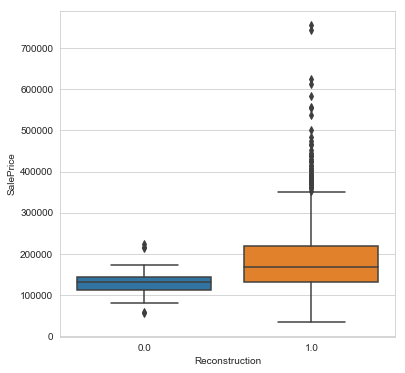

In [32]:
# Compare the above categories
#1: recon_new, no_recon_new, recon_old
# 0: no_recon_old
plt.figure(figsize=(6, 6))
sns.boxplot(x="Reconstruction", y="SalePrice", data=data2[['Reconstruction','SalePrice']])
plt.show()

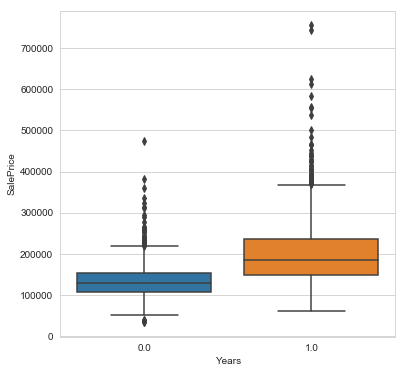

In [33]:
# Compare the above categories
# 1: new
# 0: old
plt.figure(figsize=(6, 6))
sns.boxplot(x="Years", y="SalePrice", data=data2[['Years','SalePrice']])
plt.show()

In [34]:
data2['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

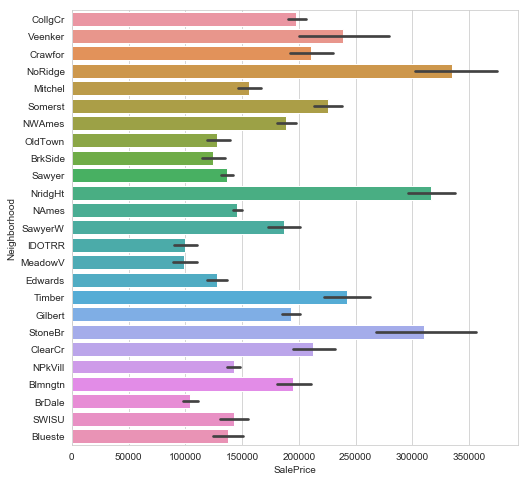

In [35]:
plt.figure(figsize=(8, 8))
sns.barplot(x='SalePrice',y = 'Neighborhood',data=data2[['Neighborhood','SalePrice']], orient ='h')
plt.show()

In [36]:
 print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


C:\Users\Maria\Anaconda3\envs\assignment-2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


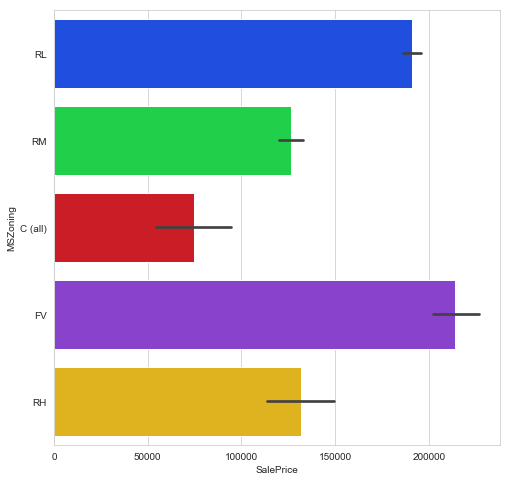

In [37]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(8, 8))
sns.barplot(x='SalePrice',y = 'MSZoning',data=data2[['MSZoning','SalePrice']], orient ='h')
plt.show()

In [38]:
data2[['Neighborhood','MSZoning']].groupby('MSZoning').count()

,Neighborhood
MSZoning,
C (all),10
FV,65
RH,16
RL,1151
RM,218


In [39]:
# Create new column
data2['NeighborBinary'] = np.nan
# Find the neighborhoods with mean sale price above 200k
n1 = data2['Neighborhood'] == 'NoRidge' 
n2= data2['Neighborhood'] == 'NridgHt' 
n3 = data2['Neighborhood'] == 'StoneBr' 
n4 = data2['Neighborhood'] == 'Timber'
n5 = data2['Neighborhood'] == 'Veenker'
n6 = data2['Neighborhood'] == 'Crawfor'
n7 = data2['Neighborhood'] == 'ClearCr'
n8 =  data2['Neighborhood'] == 'Somerst'

In [40]:
# Fill 1 in neighborhoods that mean price is above limit
data2.loc[ n1 | n2 | n3 | n4 | n5 | n6 | n7 | n8, 'NeighborBinary'] = 1 # >200k
# data2.loc[ n1 | n2 | n3, 'NeighborBinary'] = 1                         >300k
data2['NeighborBinary'].fillna(0,inplace=True)
neighbors = data2[['Neighborhood', 'NeighborBinary']]
dict_neighbors = neighbors.set_index('Neighborhood').to_dict()

In [41]:
dict_neighbors

{'NeighborBinary': {'CollgCr': 0.0,
  'Veenker': 1.0,
  'Crawfor': 1.0,
  'NoRidge': 1.0,
  'Mitchel': 0.0,
  'Somerst': 1.0,
  'NWAmes': 0.0,
  'OldTown': 0.0,
  'BrkSide': 0.0,
  'Sawyer': 0.0,
  'NridgHt': 1.0,
  'NAmes': 0.0,
  'SawyerW': 0.0,
  'IDOTRR': 0.0,
  'MeadowV': 0.0,
  'Edwards': 0.0,
  'Timber': 1.0,
  'Gilbert': 0.0,
  'StoneBr': 1.0,
  'ClearCr': 1.0,
  'NPkVill': 0.0,
  'Blmngtn': 0.0,
  'BrDale': 0.0,
  'SWISU': 0.0,
  'Blueste': 0.0}}

In [42]:
#filling the missing value of Electrical feature
data2[data2['Electrical'].isnull()]['Electrical'].fillna('FuseA')

1379    FuseA
Name: Electrical, dtype: object

In [43]:
# encoding Fireplace
map1 = {'TA':1, 'Gd':1, 'Fa':1, 'Ex':1, 'Po':1, np.nan:0}

data2['Fireplace'] = data2.FireplaceQu.map(map1)

# encoding Fence
map2 = {'MnPrv':1, 'GdWo':1, 'GdPrv':1, 'MnWw':1, np.nan:0 }

data2['Exist_Fence'] = data2.Fence.map(map2)

# encoding MiscFeature
map1 = {'Shed':1, 'Gar2':1, 'Othr':1, 'TenC':1, np.nan:0 }

data2['Extra_MiscFeature'] = data2.MiscFeature.map(map1)

data2.drop(['Id','MSZoning','MiscFeature','FireplaceQu','Neighborhood','Fence'], axis=1, inplace=True)


In [44]:
#month_dict = data2[['MoSold','YrSold']]['MoSold'].value_counts().to_dict()

In [45]:
years = data2['YrSold'].value_counts().to_frame()
years

,YrSold
2009,338
2007,329
2006,314
2008,304
2010,175


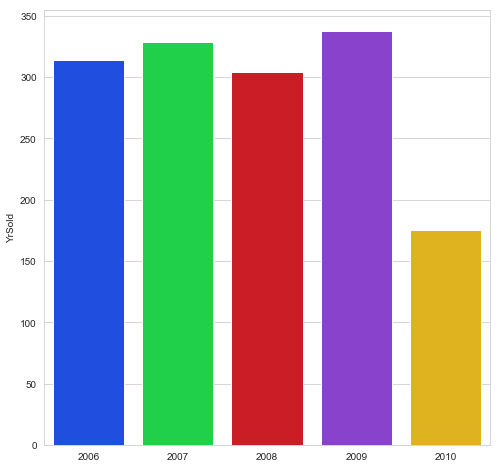

In [46]:
plt.figure(figsize=(8, 8))
sns.barplot(x=years.index.values,y = 'YrSold',data=years)
plt.show()

In [47]:
data2['SeasonalityMonth'] = np.nan
data2['SeasonalityYear'] = np.nan

# Define months with high sales
may = data2['MoSold'] == 5
june = data2['MoSold'] == 6
july = data2['MoSold'] == 7

# Define years with high sales
y_2006 = data2['YrSold'] == 2006
y_2007 = data2['YrSold'] == 2007
y_2008 = data2['YrSold'] == 2008
y_2009 = data2['YrSold'] == 2009

In [48]:
data2.loc[ may | june | july, 'SeasonalityMonth'] = 1
data2.loc[ y_2006 | y_2007 | y_2008 | y_2009, 'SeasonalityYear'] = 1

data2['SeasonalityMonth'].fillna(0,inplace=True)
data2['SeasonalityYear'].fillna(0,inplace=True)

data2['Period'] = data2['YrSold'] - data2['YearBuilt']

data2[['Period','SalePrice']].groupby('Period').mean().head()

,SalePrice
Period,
0,264302.234375
1,266914.000000
2,223247.846154
3,253159.722222
4,199063.414634


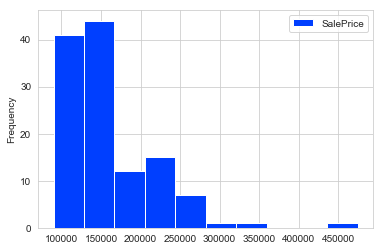

In [49]:
data2[['Period','SalePrice']].groupby('Period').mean().plot(kind='hist')
plt.show()

In [50]:
data2['TotalSF'] = data2['1stFlrSF'] + data2['2ndFlrSF']

data2[['TotalSF','SalePrice']].corr()

,TotalSF,SalePrice
TotalSF,1.000000,0.716883
SalePrice,0.716883,1.000000


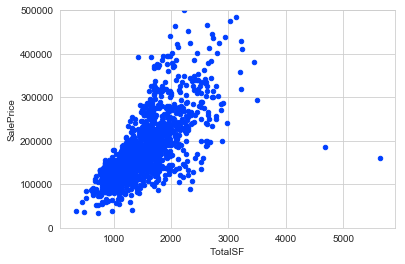

In [51]:
data2[['TotalSF','SalePrice']].plot.scatter(x='TotalSF',y = 'SalePrice')
plt.ylim((0,500000))
plt.show()

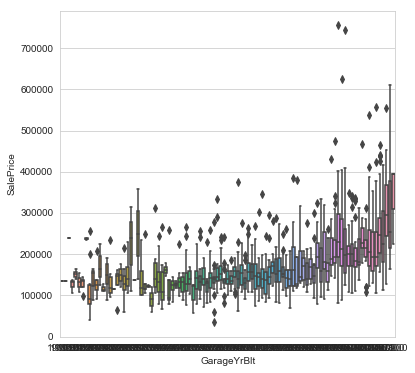

In [52]:
plt.figure(figsize=(6, 6))
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=data2[['GarageYrBlt','SalePrice']])
plt.show()

In [53]:
data2.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage     259
GarageCond       81
GarageQual       81
GarageType       81
GarageYrBlt      81
GarageFinish     81
BsmtFinType2     38
BsmtExposure     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
OverallQual       0
dtype: int64

In [54]:
# Fill NULL values
data2['LotFrontage'] = data2['LotFrontage'].fillna(0)
data2['MasVnrArea'] = data2['MasVnrArea'].fillna(0)
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna(-1)

In [55]:
data3 = data2.drop(['MSSubClass','1stFlrSF', '2ndFlrSF','SeasonalityMonth', 'SeasonalityYear','MoSold','YrSold','YearBuilt','YearRemodAdd'],axis=1)
data4 = pd.get_dummies(data3)

## Feature Selection

In [56]:
y = data4['SalePrice']
X = data4.drop(['SalePrice'],axis=1)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

In [58]:
lr = RandomForestRegressor(n_estimators=100)
lr.fit(X,y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=80)
rfe.fit(X,y)
#ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
  n_features_to_select=80, step=1, verbose=0)

In [59]:
X2 = rfe.transform(X)

X_tr, X_ts, y_tr, y_ts = train_test_split(X2, y, test_size=0.25)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((1095, 80), (365, 80), (1095,), (365,))

In [60]:
def rmsle(y_true, y_pred):
   assert len(y_true) == len(y_pred)
   terms_to_sum = [(math.log(abs(y_pred[i] + 1)) - math.log(abs(y_true[i] + 1))) ** 2.0 for i,_ in enumerate(y_pred)]
   return (sum(terms_to_sum) * (1.0/len(y_true))) ** 0.5

In [65]:
rf = RandomForestRegressor()
scaler = StandardScaler()
pipe = Pipeline([('standardizer', scaler), ('regressor', rf)])

param_grid = {'regressor__n_estimators': [100, 120, 180]
             #   'regressor__max_depth': [3, None],
             #'regressor__max_features': [1, 3, 10],
             }

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_tr, y_tr)

preds = grid.predict(X_ts)
print(grid.best_estimator_)
print(rmsle(y_ts.values, preds))

Pipeline(memory=None,
     steps=[('standardizer', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])
0.15584297480191717
